In [1]:
from sktime.forecasting.base import ForecastingHorizon
from sktime.split import (
    CutoffSplitter,
    ExpandingWindowSplitter,
    SingleWindowSplitter,
    SlidingWindowSplitter,
    temporal_train_test_split,
)

In [2]:
def plot_windows(y, train_windows, test_windows, title=""):
    """Visualize training and test windows"""

    simplefilter("ignore", category=UserWarning)

    def get_y(length, split):
        # Create a constant vector based on the split for y-axis."""
        return np.ones(length) * split

    n_splits = len(train_windows)
    n_timepoints = len(y)
    len_test = len(test_windows[0])

    train_color, test_color = sns.color_palette("colorblind")[:2]

    fig, ax = plt.subplots(figsize=plt.figaspect(0.3))

    for i in range(n_splits):
        train = train_windows[i]
        test = test_windows[i]

        ax.plot(
            np.arange(n_timepoints), get_y(n_timepoints, i), marker="o", c="lightgray"
        )
        ax.plot(
            train,
            get_y(len(train), i),
            marker="o",
            c=train_color,
            label="Window",
        )
        ax.plot(
            test,
            get_y(len_test, i),
            marker="o",
            c=test_color,
            label="Forecasting horizon",
        )
    ax.invert_yaxis()
    ax.yaxis.set_major_locator(MaxNLocator(integer=True))
    ax.set(
        title=title,
        ylabel="Window number",
        xlabel="Time",
        xticklabels=y.index,
    )
    # remove duplicate labels/handles
    handles, labels = [(leg[:2]) for leg in ax.get_legend_handles_labels()]
    ax.legend(handles, labels);

In [3]:
import numpy as np
import pandas as pd

In [4]:
import matplotlib.pyplot as plt

def plot_blood_glucose(time_series_data, start=0, end=30, figsize=(10, 6)):
    """
    Plots the blood glucose levels for a specified range of time points.
    
    Parameters:
    - time_series_data: DataFrame containing the time series data with a 'bg' column.
    - start: Starting index of the range to plot (default is 0).
    - end: Ending index of the range to plot (default is 30).
    - figsize: Tuple specifying the figure size (default is (10, 6)).
    """
    # Plot directly using matplotlib
    plt.figure(figsize=figsize)
    plt.plot(time_series_data.index[start:end], time_series_data['bg'].iloc[start:end], marker='o')
    plt.title(f'Blood Glucose Time Series (Points {start} to {end})')
    plt.xlabel('Time')
    plt.ylabel('Blood Glucose Level')
    plt.grid(True)
    plt.xticks(rotation=45)
    plt.tight_layout()

    # Show the plot
    plt.show()

# Example usage:
# plot_blood_glucose(time_series_data, start=0, end=30)


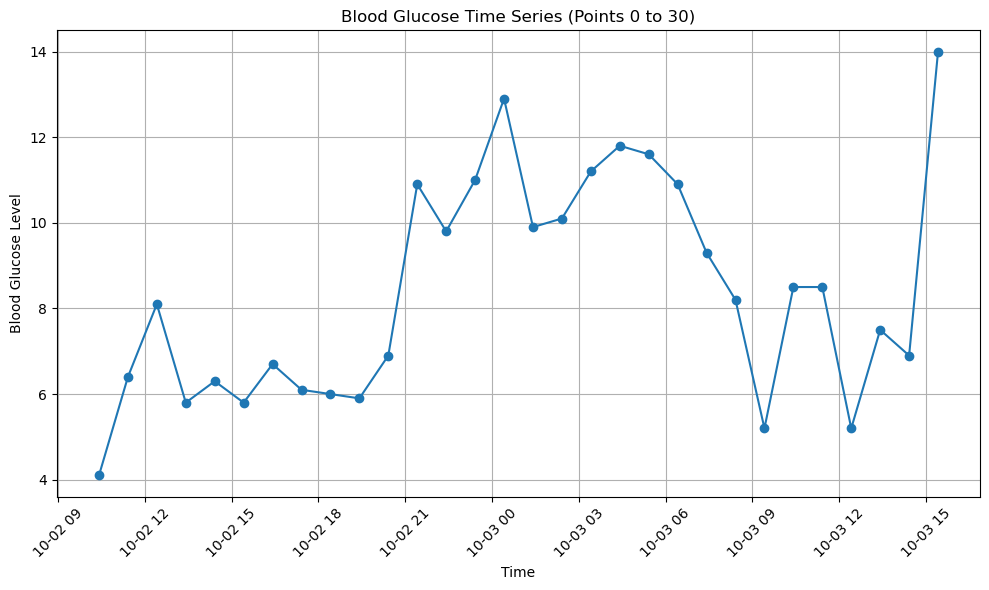

pandas.core.series.Series

In [5]:

# Generate synthetic time series data (replace with your actual time series data)
time_series_data = pd.read_csv(r"..\data/processed/cleaned_up_patients/p12.csv")

# Ensure 'time' is converted to a DatetimeIndex
time_series_data['time'] = pd.to_datetime(time_series_data['time'])
time_series_data.set_index('time', inplace=True)

# Extract the 'bg' column as a Series for the first 30 values
test = time_series_data['bg'].iloc[:30]

plot_blood_glucose(time_series_data, start=0, end=30)

type(test)

In [6]:
from sktime.forecasting.model_selection import temporal_train_test_split
import pandas as pd

# Read and process the data
time_series_data = pd.read_csv(r"..\data/processed/cleaned_up_patients/p12.csv")

# Ensure that 'time' is a DatetimeIndex
time_series_data['time'] = pd.to_datetime(time_series_data['time'])
time_series_data.set_index('time', inplace=True)

# Extract the 'bg' column as a Series
test = time_series_data['bg'].iloc[:30]

# Ensure the index is a DatetimeIndex
print(type(test.index))  # Should be <class 'pandas.core.indexes.datetimes.DatetimeIndex'>

# Now, you can split the time series data
y_train, y_test = temporal_train_test_split(y=test, test_size=0.25)

# Check the results
print("y_train:", y_train.head())
print("y_test:", y_test.head())

<class 'pandas.core.indexes.datetimes.DatetimeIndex'>


AttributeError: module 'dask' has no attribute 'dataframe'

In [7]:
!pip install --upgrade dask numpy

  Using cached numpy-2.1.2-cp312-cp312-win_amd64.whl.metadata (59 kB)
   ---------------------------------------- 0.0/1.3 MB ? eta -:--:--
   ---------------------------------------- 1.3/1.3 MB 21.2 MB/s eta 0:00:00
Using cached numpy-2.1.2-cp312-cp312-win_amd64.whl (12.6 MB)
  Attempting uninstall: numpy
    Found existing installation: numpy 1.26.4
    Uninstalling numpy-1.26.4:
      Successfully uninstalled numpy-1.26.4


ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
sktime 0.33.1 requires numpy<2.1,>=1.21, but you have numpy 2.1.2 which is incompatible.
tensorflow-intel 2.17.0 requires numpy<2.0.0,>=1.26.0; python_version >= "3.12", but you have numpy 2.1.2 which is incompatible.


In [7]:
!pip uninstall tensorflow

^C


In [ ]:
%pip uninstall numpy

In [11]:
!pip install numpy==1.21.6

^C


In [13]:
print("a")

a
